# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [ ]:
import csv
from google.colab import files
uploaded = files.upload()

def data_parser():
  with open('states_history.csv',encoding = 'utf8') as infile:
    reader = csv.reader(infile)
    readerlist = [line for line in reader]
  fixedlist =[]
  for eachlist in readerlist:
    eachlist = eachlist[0:20]
    del eachlist[13:19]
    del eachlist[7:12]
    del eachlist[3:6]
    fixedlist.append(eachlist)

  headers = fixedlist[0]
  data = fixedlist[1::]
  amendedlist = []
  for eachlist in data:
    if eachlist[2] == '':
        eachlist[2] = 'No Data'
    else:
        eachlist[2] = int(eachlist[2])

    if eachlist[3] == '':
        eachlist[3] = 'No Data'
    else:
        eachlist[3] = int(eachlist[3])

    if eachlist[4] == '':
        eachlist[4] = 'No Data'
    else:
        eachlist[4] = int(eachlist[4])

    if eachlist[5] == '':
        eachlist[5] = 'No Data'
    else:
        eachlist[5] = int(eachlist[5])
    amendedlist.append(eachlist)
  amendedlist.sort(key = lambda x: x[1])
  for eachline in amendedlist:
    dateComp = eachline[0].split('-')
    if dateComp[1][0] == '0':
        dateComp[1] = dateComp[1][-1]
    if dateComp[2][0] == '0':
        dateComp[2] = dateComp[2][-1]
    date = dateComp[1]+'-'+dateComp[2]+'-'+dateComp[0]
    eachline[0] = date
  with open("cleaned_CSV.csv","w") as newFile:
    writer = csv.writer(newFile)
    writer.writerows(amendedlist)
  return amendedlist




############ Function Call ############
data_parser()

Saving states_history.csv to states_history.csv


[['3-7-2021', 'AK', 305, 1293, 'No Data', 56886],
 ['3-6-2021', 'AK', 305, 1293, 'No Data', 56886],
 ['3-5-2021', 'AK', 305, 1293, 'No Data', 56886],
 ['3-4-2021', 'AK', 303, 1290, 'No Data', 56745],
 ['3-3-2021', 'AK', 303, 1285, 'No Data', 56605],
 ['3-2-2021', 'AK', 302, 1286, 'No Data', 56428],
 ['3-1-2021', 'AK', 300, 1279, 'No Data', 56339],
 ['2-28-2021', 'AK', 290, 1277, 'No Data', 55989],
 ['2-27-2021', 'AK', 290, 1277, 'No Data', 55989],
 ['2-26-2021', 'AK', 290, 1277, 'No Data', 55989],
 ['2-25-2021', 'AK', 290, 1271, 'No Data', 55886],
 ['2-24-2021', 'AK', 290, 1260, 'No Data', 55736],
 ['2-23-2021', 'AK', 290, 1260, 'No Data', 55560],
 ['2-22-2021', 'AK', 290, 1251, 'No Data', 55507],
 ['2-21-2021', 'AK', 289, 1243, 'No Data', 55198],
 ['2-20-2021', 'AK', 289, 1243, 'No Data', 55198],
 ['2-19-2021', 'AK', 289, 1243, 'No Data', 55198],
 ['2-18-2021', 'AK', 288, 1243, 'No Data', 55009],
 ['2-17-2021', 'AK', 288, 1238, 'No Data', 54799],
 ['2-16-2021', 'AK', 287, 1233, 'No Da

## Web Collection Requirement \#1


In [ ]:
import json
import csv
from google.colab import files
uploaded = files.upload()

def web_parser1():
  json2dict = json.load(open('Covid_Data.json', 'r'))
  dictList = []
  for i in json2dict:
    strDate = str(i['date'])
    i['date'] = strDate[2:4] +  '-' + strDate[4:6] + '-' + strDate[6::]
    if i['death'] == None:
        i['death'] = 0
    if i['positive'] == None:
        i['positive'] = 0
    if i['hospitalized'] == None:
        i['hospitalized'] = 0
    if i['negative'] == None:
        i['negative'] = 0
    cleanedDict = {"state":i["state"], "positive":i['positive'], "negative":i['negative'], 'hospitalized':i['hospitalized'], 'death':i['death'], 'date':i['date']}
    dictList.append(cleanedDict)
  dictList.sort(key = lambda x: x['state'])
  with open("cleaned_JSON.csv","w") as newFile:
    dw = csv.DictWriter(newFile, fieldnames = dictList[0].keys())
    dw.writeheader()
    dw.writerows(dictList)
  return dictList



############ Function Call ############
web_parser1()

Saving Covid_Data.json to Covid_Data.json


[{'date': '21-03-07',
  'death': 305,
  'hospitalized': 1293,
  'negative': 0,
  'positive': 56886,
  'state': 'AK'},
 {'date': '21-03-06',
  'death': 305,
  'hospitalized': 1293,
  'negative': 0,
  'positive': 56886,
  'state': 'AK'},
 {'date': '21-03-05',
  'death': 305,
  'hospitalized': 1293,
  'negative': 0,
  'positive': 56886,
  'state': 'AK'},
 {'date': '21-03-04',
  'death': 303,
  'hospitalized': 1290,
  'negative': 0,
  'positive': 56745,
  'state': 'AK'},
 {'date': '21-03-03',
  'death': 303,
  'hospitalized': 1285,
  'negative': 0,
  'positive': 56605,
  'state': 'AK'},
 {'date': '21-03-02',
  'death': 302,
  'hospitalized': 1286,
  'negative': 0,
  'positive': 56428,
  'state': 'AK'},
 {'date': '21-03-01',
  'death': 300,
  'hospitalized': 1279,
  'negative': 0,
  'positive': 56339,
  'state': 'AK'},
 {'date': '21-02-28',
  'death': 290,
  'hospitalized': 1277,
  'negative': 0,
  'positive': 55989,
  'state': 'AK'},
 {'date': '21-02-27',
  'death': 290,
  'hospitalized': 

## Web Collection Requirement #2

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv
from google.colab import files
uploaded = files.upload()

def web_parser2():
    with open ('Phase2.html') as f:
        soup = BeautifulSoup(f,"html.parser")
    table_data = soup.find('table')
    headings = [th.get_text().strip() for th in table_data.find("tr").find_all("th")]
    clean_data = {}
    for row in table_data.find_all("tr")[1:]:
        l1 = []
        for td in row.find_all("td"):
            l1.append(td.text)
        if l1[3] == '':
            l1[3] = "N/A"
        if "Entire State" in l1[1]:
            clean_data[l1[0]] = "Entire State",l1[3]
        if "Parts of State" in l1[1]:
            clean_data[l1[0]] = "Part of State",l1[3]
        if l1[1] == "No":
            clean_data[l1[0]] = "Not Required",l1[3]

    ordered_data = {}
    us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
    }

    # print (us_state_abbrev)

    for key,value in clean_data.items():
        for key2,value2 in us_state_abbrev.items():
            if key == key2: 
                ordered_data[value2] = value
    ordered_data_items = ordered_data.items()
    final_data = sorted(ordered_data_items)

    list_of_dic = []
    for x in final_data:
        dic = {}
        dic["Date"] = x[1][1]
        dic["Mask Required"] = x[1][0]
        dic["State"] = x[0]
        list_of_dic.append(dic)

    #print (list_of_dic)


    headers = ["State","Mask Required","Date"]

    with open('cleaned_HTML.csv', 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames = headers)
        writer.writeheader()
        writer.writerows(list_of_dic)
    return list_of_dic

############ Function Call ############
web_parser2()

Saving Phase2.html to Phase2 (1).html


[{'Date': 'N/A', 'Mask Required': 'Part of State', 'State': 'AK'},
 {'Date': '7/16/2020', 'Mask Required': 'Entire State', 'State': 'AL'},
 {'Date': '7/20/2020', 'Mask Required': 'Entire State', 'State': 'AR'},
 {'Date': 'N/A', 'Mask Required': 'Part of State', 'State': 'AZ'},
 {'Date': '6/18/2020', 'Mask Required': 'Entire State', 'State': 'CA'},
 {'Date': '7/17/2020', 'Mask Required': 'Entire State', 'State': 'CO'},
 {'Date': '4/17/2020', 'Mask Required': 'Entire State', 'State': 'CT'},
 {'Date': '5/1/2020', 'Mask Required': 'Entire State', 'State': 'DE'},
 {'Date': 'N/A', 'Mask Required': 'Part of State', 'State': 'FL'},
 {'Date': 'N/A', 'Mask Required': 'Part of State', 'State': 'GA'},
 {'Date': '4/20/2020', 'Mask Required': 'Entire State', 'State': 'HI'},
 {'Date': '11/17/2020', 'Mask Required': 'Entire State', 'State': 'IA'},
 {'Date': 'N/A', 'Mask Required': 'Part of State', 'State': 'ID'},
 {'Date': '5/1/2020', 'Mask Required': 'Entire State', 'State': 'IL'},
 {'Date': '7/27/20

#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. In our CSV file, we fased a large amount of blankcells on a variety of categories ranging from "deaths confirmed" to "number hospitalized." We handled this by replacing these blank spaces with "no data" to make sure it very clear that some of the dates might not be helpful in our analysis in phase 3. We also went ahead and deleted some of the columns we werent going to use to make it easier for us when it comes to phase 3.

2. In our webscrape, we ran into a problem where the state names were not abbreviated(E x: Georgia was put as "Georgia" and not "GA")like in the other data sets. To fix this inconsistency, we went ahead and changed all the states to their abbreviated format ("Georgia ---> "GA") so it'll make phase 3 a lot easer.

3. In our CSV file we had to change the data type of some of the information(death, number hospialized..) since most of the numbers came in as strings. We decided to change it to numbers as this would make phase 3 significantly easier for us as we will be using numpy and pandas.

4. In all of our data sets we decided to alphabeticalized the information by state since all the data sets had the states in a random order. This will be super important when it comes to phase 3 as it will allows us to compare data a easier and more efficently.

5. In our json file the dates came in as a eight digit number with no spaces or dashes to seperate the day, month, and year. We fixed this by changing it to a proper date format(month-day-year) so when we analyze our data it will be easier to read and understand.


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source: https://covidtracking.com/data/download/all-states-history.csv 
*   Web Collection #1 Source: https://api.covidtracking.com/v1/states/daily.json
*   Web Collection #2 Source: https://masks4all.co/what-states-require-masks/ 
*   Extra Source #1<b> (NOT USED IN PHASE II)</b>: https://www.kaggle.com/lucasvictor/us-state-populations-2018 (This was used in phase 3 to get the population of each state. I ran this by Bohong and he said it was all good! We still had to clean some of this data (deleting some "states" and abbreviating all the states)



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Insights

In [ ]:
import csv
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
def insight1():
  with open('State_Populations.csv') as infile:
    df = pd.read_csv(infile)
  df = df.drop([48])
  pop_dict = df.set_index('State').T.to_dict('list')

  ordered_data = {}
  us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
    }

  for key,value in pop_dict.items():
      for key2,value2 in us_state_abbrev.items():
        if key == key2: 
          ordered_data[value2] = value
  ordered_data_items = ordered_data.items()
  final_data = sorted(ordered_data_items)
  state_dic_pop = {}
  for x in final_data:
    state_dic_pop[x[0]] = x[1]
  pop_dict = state_dic_pop 

  with open('cleaned_JSON.csv') as infile:
      df = pd.read_csv(infile)
  indexNames = df[df['date'] != '21-03-07'].index
  df.drop(indexNames , inplace=True)
  del df["death"]
  del df['date']
  del df['negative']
  del df['hospitalized']
  state_postitive= df.set_index('state').T.to_dict('list')
  #return state_postitive

  wantedStates = ['CA','TX','FL','NY','PA','IL','OH','GA','NC','MI']
  redStates = ['FL','NC','OH','TX']

  redState_pop = 0
  bluestate_pop = 0
  for key, value in pop_dict.items():
    if key in wantedStates and key in redStates:
      redState_pop += value[0]
    elif key in wantedStates and key not in redStates:
      bluestate_pop += value[0]

  redState_pos = 0
  bluestate_pos = 0
  for key, value in state_postitive.items():
    if key in wantedStates and key in redStates:
      redState_pos += value[0]
    elif key in wantedStates and key not in redStates:
      bluestate_pos += value[0]


  Final_result = {"Democratic": ((bluestate_pos/bluestate_pop)*100), "Republican": ((redState_pos/redState_pop)*100)}
  final_df = pd.DataFrame(list(Final_result.items()),columns = ["Political Party",'Percentage of the Party Population that Tested Positive'])
  return final_df






############ Function Call ############
insight1()

Saving cleaned_CSV.csv to cleaned_CSV (12).csv
Saving cleaned_HTML.csv to cleaned_HTML (17).csv
Saving cleaned_JSON.csv to cleaned_JSON (17).csv
Saving State_Populations.csv to State_Populations (17).csv


,Political Party,Percentage of the Party Population that Tested Positive
0,Democratic,8.517796
1,Republican,8.941128


### Insight 1 Explanation
<b> Does majority political party of a state affect percent of population to test positive?</b>

For this insight, we were looking to see if which political party had majority in each state would affect the average positive COVID-19 cases for the state. This is a realistic question because COVID-19 sparked mass political divide between the Republican and Democratic states, as the Democrats tended to push for safer measures. This is meaningful because people tend to believe that "Blue" or Democratic states have safer conditions. According to our data, there is no clear correlation between political party and percentage of population to test positive. Although it should be noted that Democratic states have a slightly lower percentage test positive.

In [ ]:

import pandas as pd
import numpy as np 
import urllib 
import requests
from google.colab import files
uploaded = files.upload()

# gettting the populations of each state into a dictionary and in a abrreviated form

def insight2():

	# here we made a dictionary with the population of each state
	with open('State_Populations.csv') as infile:
		df = pd.read_csv(infile)
	df = df.drop([48])
	pop_dict = df.set_index('State').T.to_dict('list')

	ordered_data = {}
	us_state_abbrev = {
	    'Alabama': 'AL',
	    'Alaska': 'AK',
	    'Arizona': 'AZ',
	    'Arkansas': 'AR',
	    'California': 'CA',
	    'Colorado': 'CO',
	    'Connecticut': 'CT',
	    'Delaware': 'DE',
	    'Florida': 'FL',
	    'Georgia': 'GA',
	    'Hawaii': 'HI',
	    'Idaho': 'ID',
	    'Illinois': 'IL',
	    'Indiana': 'IN',
	    'Iowa': 'IA',
	    'Kansas': 'KS',
	    'Kentucky': 'KY',
	    'Louisiana': 'LA',
	    'Maine': 'ME',
	    'Maryland': 'MD',
	    'Massachusetts': 'MA',
	    'Michigan': 'MI',
	    'Minnesota': 'MN',
	    'Mississippi': 'MS',
	    'Missouri': 'MO',
	    'Montana': 'MT',
	    'Nebraska': 'NE',
	    'Nevada': 'NV',
	    'New Hampshire': 'NH',
	    'New Jersey': 'NJ',
	    'New Mexico': 'NM',
	    'New York': 'NY',
	    'North Carolina': 'NC',
	    'North Dakota': 'ND',
	    'Ohio': 'OH',
	    'Oklahoma': 'OK',
	    'Oregon': 'OR',
	    'Pennsylvania': 'PA',
	    'Rhode Island': 'RI',
	    'South Carolina': 'SC',
	    'South Dakota': 'SD',
	    'Tennessee': 'TN',
	    'Texas': 'TX',
	    'Utah': 'UT',
	    'Vermont': 'VT',
	    'Virginia': 'VA',
	    'Washington': 'WA',
	    'West Virginia': 'WV',
	    'Wisconsin': 'WI',
	    'Wyoming': 'WY'
	    }

	for key,value in pop_dict.items():
		for key2,value2 in us_state_abbrev.items():
			if key == key2:
				ordered_data[value2] = value
	ordered_data_items = ordered_data.items()
	final_data = sorted(ordered_data_items)
	state_dic_pop = {}
	for x in final_data:
		state_dic_pop[x[0]] = x[1]
	pop_dict = state_dic_pop 

	 

	# this is for the number of deaths per state
	with open('cleaned_JSON.csv') as infile:
		  df = pd.read_csv(infile)
	indexNames = df[df['date'] != '21-03-07'].index
	df.drop(indexNames , inplace=True)
	del df["positive"]
	del df['date']
	del df['negative']
	del df['hospitalized']
	state_death = df.set_index('state').T.to_dict('list')

	
	# this is for the type of policy 
	with open('cleaned_HTML.csv') as file:
	  df2 = pd.read_csv(file)
	del df2['Date']
	state_policy = df2.set_index('State').T.to_dict('list')

	# this is the list with what state is in what policy
	not_required = []
	part_required = []
	fully_required = []

	for key, value in state_policy.items():
		for x in value:
			if x == 'Entire State':
				fully_required.append(key)
			elif x == 'Part of State':
				part_required.append(key)
			elif x == "Not Required":
				not_required.append(key)


	Total_death_fully_required = 0 
	Total_death_partly_required = 0 
	Total_death_not_required = 0 



	for key, value in state_death.items():
		for x in value:
			if key in not_required:
				Total_death_not_required += int(x)
			elif key in part_required:
				Total_death_partly_required += int(x)
			elif key in fully_required:
				Total_death_fully_required += int(x)


	population_fully_required = 0
	population_partly_required = 0
	population_not_required = 0 

	for key, value in pop_dict.items():
		if key in not_required:
			population_not_required += value[0]
		elif key in part_required:
			population_partly_required += value[0]
		elif key in fully_required:
			population_fully_required += value[0]


	Final_result = {"Mask not required in any part of state": ((Total_death_not_required/population_not_required)*100), "Mask required in part of state": ((Total_death_partly_required/population_partly_required)*100), "Mask requried in entire state": ((Total_death_fully_required/population_fully_required)*100)}
	final_df = pd.DataFrame(list(Final_result.items()),columns = ["Policy",'Percentage of Mask Policy Population who Died'])
	return final_df





############ Function Call ############
insight2()

Saving cleaned_CSV.csv to cleaned_CSV (11).csv
Saving cleaned_HTML.csv to cleaned_HTML (16).csv
Saving cleaned_JSON.csv to cleaned_JSON (16).csv
Saving State_Populations.csv to State_Populations (16).csv


,Policy,Percentage of Mask Policy Population who Died
0,Mask not required in any part of state,0.216453
1,Mask required in part of state,0.162753
2,Mask requried in entire state,0.154626


### Insight 2 Explanation
<b>Does the mask policy affect the percentage of the population that dies in the state?</b>

The data frame above shows the percent of the population that died in different mask policy regions around the United States. The percentage of the population that died under each policy was calculated by summing the number of deaths related to each policy, then dividing by the total population that the policy covered, and finally multiplying by 100 to get the percentage. To get this done, we had to add another data source on top of our original three, which was a CSV file with the population of each state. This data above proves our initial hypothesis that the overall death rate in states that had entire state mask mandates was lower than in states that had part of the state mandates and states that did not require a mask at all. This insight is meaningful as it shows all this mask-wearing is actually worth it as it significantly lowers the odds of someone dying.  This evidence proves that we can save lives if we all wear masks! It is also very realistic since many people argue that mask mandates are pointless (clearly, the data proves otherwise) and since our calculation took into account the different populations that each mask policy covered. Looking at the data frame, we can see that the death rate in states where masks are required in the entire state was  .06% lower than in states that did not require masks at all and .008% lower than in states that required masks in part of the states. Now, this might not seem like a lot, however; if we break it down to similar terms, this means that the odds of someone dying in a state that has an entire state mask mandate is roughly 1 in almost  650, while the odds of someone dying in a state that had mask requirement in part of the state was 1 in 613. The odds of someone dying in a state with no mask mandate was even worse at 1 in 463. That is a big difference when it comes to talking about human life.

In [ ]:
import pandas as pd
import numpy as np 
import urllib 
import requests
from google.colab import files
uploaded = files.upload()

# gettting the populations of each state into a dictionary and in a abrreviated form

def insight3():

  with open('State_Populations.csv') as infile:
      df = pd.read_csv(infile)
  df = df.drop([48])
  pop_dict = df.set_index('State').T.to_dict('list')

  ordered_data = {}
  us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
    }

  for key,value in pop_dict.items():
      for key2,value2 in us_state_abbrev.items():
        if key == key2: 
          ordered_data[value2] = value
  ordered_data_items = ordered_data.items()
  final_data = sorted(ordered_data_items)
  state_dic_pop = {}
  for x in final_data:
    state_dic_pop[x[0]] = x[1]
  pop_dict = state_dic_pop 


  # this is for the number of postive and neg tests per state
  with open('cleaned_JSON.csv') as infile:
      df = pd.read_csv(infile)
  indexNames = df[df['date'] != '21-03-07'].index
  df.drop(indexNames , inplace=True)
  del df["death"]
  del df['date']
  del df['hospitalized']
  del df['negative']
  state_positive = df.set_index('state').T.to_dict('list')

  
  del_list = []
  for key, value in state_positive.items():
    for x in value:
      if x == 0:
        del_list.append(key)

  for x in del_list:
    del state_positive[x]
  
  # this is for the type of policy 
  with open('cleaned_HTML.csv') as file:
     df2 = pd.read_csv(file)
  del df2['Date']
  state_policy = df2.set_index('State').T.to_dict('list')

  # this is the list with what state is in what policy
  not_required = []
  part_required = []
  fully_required = []

  for key, value in state_policy.items():
    for x in value:
      if x == 'Entire State' and key in state_positive:
        fully_required.append(key)
      elif x == 'Part of State' and key in state_positive:
        part_required.append(key)
      elif x == "Not Required" and key in state_positive:
        not_required.append(key)


  Total_pos_fully_required = 0 
  Total_pos_partly_required = 0 
  Total_pos_not_required = 0 

  for key, value in state_positive.items():
    for x in value:
      if key in not_required:
        Total_pos_not_required += int(x)
      elif key in part_required:
        Total_pos_partly_required += int(x)
      elif key in fully_required:
        Total_pos_fully_required += int(x)


  #population of the different mask plocies
  population_fully_required = 0
  population_partly_required = 0
  population_not_required = 0 

  for key, value in pop_dict.items():
    if key in not_required and key in state_positive:
      population_not_required += value[0]
    elif key in part_required and key in state_positive:
      population_partly_required += value[0]
    elif key in fully_required and key in state_positive:
      population_fully_required += value[0]


  Final_result = {"Mask not required in any part of state": ((Total_pos_not_required/population_not_required)*100), "Mask required in part of State": ((Total_pos_partly_required/population_partly_required)*100), "Mask requried in entire state": ((Total_pos_fully_required/population_fully_required)*100)}
  final_df = pd.DataFrame(list(Final_result.items()),columns = ["Policy",'Percentage of Mask Policy Population that Tested Postive'])

  return final_df




############ Function Call ############
insight3()

Saving cleaned_CSV.csv to cleaned_CSV (10).csv
Saving cleaned_HTML.csv to cleaned_HTML (15).csv
Saving cleaned_JSON.csv to cleaned_JSON (15).csv
Saving State_Populations.csv to State_Populations (15).csv


,Policy,Percentage of Mask Policy Population that Tested Postive
0,Mask not required in any part of state,12.940339
1,Mask required in part of State,9.767894
2,Mask requried in entire state,8.471967


### Insight 3 Explanation
<b>Does the mask policy affect the amount of positive test cases?</b>

The above data frame shows the percentage of the population that tested positive based on the mask policy. The calculations were done by summing the total number of positive tests for each policy, then dividing that by the total population that that policy covered, and finally multiplying by 100 to get the percentage. To get this done, we use the other data source we implemented, the CSV file with the population of each state, on top of our original three.  Our findings are meaningful as they yet again show the impact of an entire state mask mandate. It clearly showed that entire state mask mandates lead to a decrease in the amount of positive covid tests and an overall decrease in the rate of spread of COVID.  This insight is not only meaningful, but it is also extremely realistic as our data took into account the different population sizes and areas. On top of this, it is realistic since it answers the question many citizens today keep coming back to, which is "do masks really slow the rate of covid." Looking more closely at the data frame, we can see that only 8.4% of the population covered by entire states mask mandates tested positive, while 9.7% of the population covered by part of the state mask mandates tested positive. Even worse, the population covered by no mask mandate had 12.9% of its population test positive. This is quite a big difference and goes to show the importance of wearing masks. Now one may be thinking; there is no way that almost 30% of the total US population has gotten covid; however, one must remember that the data above is for ALL positive tests. It is very common for people to take multiples tests to make sure they are positive, and we have to remember that COVID is not a one-and-done kind of thing. It is quite easy to catch it again if you are not careful. 

In [ ]:
import pandas as pd
import numpy as np 
import urllib 
import requests
from google.colab import files
uploaded = files.upload()

# gettting the populations of each state into a dictionary and in a abrreviated form

def insight4():

  with open('State_Populations.csv') as infile:
      df = pd.read_csv(infile)
  df = df.drop([48])
  pop_dict = df.set_index('State').T.to_dict('list')

  ordered_data = {}
  us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
    }

  for key,value in pop_dict.items():
      for key2,value2 in us_state_abbrev.items():
        if key == key2: 
          ordered_data[value2] = value
  ordered_data_items = ordered_data.items()
  final_data = sorted(ordered_data_items)
  state_dic_pop = {}
  for x in final_data:
    state_dic_pop[x[0]] = x[1]
  pop_dict = state_dic_pop 

  # GETS THE DATE FOR EACH "ENTIRE STATE" MASK POLICYS
  with open('cleaned_HTML.csv') as file:
    df = pd.read_csv(file)
  df = df.dropna()
  indexNames = df[df['Mask Required'] != 'Entire State'].index
  df.drop(indexNames , inplace=True)
  del df["Mask Required"]
  state_date = df.set_index('State').T.to_dict('list')
  

  # GETS THE DEATHS OF EACH STATE
  with open('cleaned_JSON.csv') as infile:
      df = pd.read_csv(infile)
  indexNames = df[df['date'] != '21-03-07'].index
  df.drop(indexNames , inplace=True)
  del df["positive"]
  del df['date']
  del df['negative']
  del df['hospitalized']
  state_death = df.set_index('state').T.to_dict('list')
  

  state_death_date_dic = {}
  for key1, value1 in state_date.items():
    for key2, value2 in state_death.items():
      if key1 == key2:
        state_death_date_dic[key1] = value2[0], value1[0]

  final_dic = {}
  for key1,value1 in state_death_date_dic.items():
    for key2, value2 in pop_dict.items():
      if key1 == key2:
        final_dic[key1] = [((value1[0]/value2[0]) * 100), value1[1]]


  final_df = pd.DataFrame.from_dict(final_dic, orient = 'index', columns = ['Percentage of State Population that Died', 'Date'])
  # final_df = pd.DataFrame(list(final_dic.items()),columns = ['Death Percentage', 'Date
  final_df = final_df.sort_values(by="Percentage of State Population that Died")
  return final_df





############ Function Call ############
insight4()

Saving cleaned_CSV.csv to cleaned_CSV (9).csv
Saving cleaned_HTML.csv to cleaned_HTML (14).csv
Saving cleaned_JSON.csv to cleaned_JSON (14).csv
Saving State_Populations.csv to State_Populations (14).csv


,Percentage of State Population that Died,Date
HI,0.031198,4/20/2020
VT,0.033335,8/1/2020
ME,0.052624,5/1/2020
OR,0.054672,7/1/2020
UT,0.062545,11/9/2020
WA,0.066941,6/26/2020
NH,0.087666,11/20/2020
CO,0.105362,7/17/2020
KY,0.107753,7/10/2020
NC,0.110701,6/26/2020


### Insight 4 Explanation
<b>Does the time at which the "Entire State" mask mandate is enacted affect the number of deaths in the state?</b>

The data frame above shows the percentage of the population that died in various states with an entire state mask mandate. The percentage of the population that died was calculated by dividing the number of deaths in each state by the total population of that state and multiplying by 100. Much like the other insights, we had to use the state population CSV file we added to our main three. We chose only to do the states with "entire state" mask mandates as it gave us the most data points and a standard to go off of. The data frame is sorted based on the percentage of the population that died in each state. These numbers were sorted in ascending order. From the data frame, we concluded that the time at which the entire state mask mandate was put in place had little to no effect on the percentage of the population that died. As we can see from the data, as the percentage of the population that died in each state increases, the date at which a mandate was put in place fluctuates quite heavily, meaning there doesn't seem to be any correlation. This could be the case for a couple of reasons ranging from the time interval being so large that the people who were at higher risk had already leveled off to citizens not following guidelines.  Nonetheless, our findings are very meaningful and realistic as they show that there doesn't seem to be a correlation between the percentage of the population that died and the time at which a mask mandate was put in place. This in of its self is super meaningful as it disproved a conclusion that many people will jump to. I am sure it will probably prove many politicians wrong as well. In regard to it being realistic, the data we have is the most up-to-date data we could find, and I couldn't think of something more realistic than using up-to-date real-world data to disprove theories that today's world seems to be jumping to. Overall, this was fairly surprising to us and went against our initial hypothesis.

In [ ]:
import csv
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
def insight5():
  with open('State_Populations.csv') as infile:
    df = pd.read_csv(infile)
  df = df.drop([48])
  pop_dict = df.set_index('State').T.to_dict('list')

  ordered_data = {}
  us_state_abbrev = {
	    'Alabama': 'AL',
	    'Alaska': 'AK',
	    'Arizona': 'AZ',
	    'Arkansas': 'AR',
	    'California': 'CA',
	    'Colorado': 'CO',
	    'Connecticut': 'CT',
	    'Delaware': 'DE',
	    'Florida': 'FL',
	    'Georgia': 'GA',
	    'Hawaii': 'HI',
	    'Idaho': 'ID',
	    'Illinois': 'IL',
	    'Indiana': 'IN',
	    'Iowa': 'IA',
	    'Kansas': 'KS',
	    'Kentucky': 'KY',
	    'Louisiana': 'LA',
	    'Maine': 'ME',
	    'Maryland': 'MD',
	    'Massachusetts': 'MA',
	    'Michigan': 'MI',
	    'Minnesota': 'MN',
	    'Mississippi': 'MS',
	    'Missouri': 'MO',
	    'Montana': 'MT',
	    'Nebraska': 'NE',
	    'Nevada': 'NV',
	    'New Hampshire': 'NH',
	    'New Jersey': 'NJ',
	    'New Mexico': 'NM',
	    'New York': 'NY',
	    'North Carolina': 'NC',
	    'North Dakota': 'ND',
	    'Ohio': 'OH',
	    'Oklahoma': 'OK',
	    'Oregon': 'OR',
	    'Pennsylvania': 'PA',
	    'Rhode Island': 'RI',
	    'South Carolina': 'SC',
	    'South Dakota': 'SD',
	    'Tennessee': 'TN',
	    'Texas': 'TX',
	    'Utah': 'UT',
	    'Vermont': 'VT',
	    'Virginia': 'VA',
	    'Washington': 'WA',
	    'West Virginia': 'WV',
	    'Wisconsin': 'WI',
	    'Wyoming': 'WY'
	    }
  for key,value in pop_dict.items():
      for key2,value2 in us_state_abbrev.items():
        if key == key2: 
          ordered_data[value2] = value
  ordered_data_items = ordered_data.items()
  final_data = sorted(ordered_data_items)
  state_dic_pop = {}
  for x in final_data:
    state_dic_pop[x[0]] = x[1]
  pop_dict = state_dic_pop 

  with open('cleaned_CSV.csv') as infile:
	  df = pd.read_csv(infile)
  df.columns = ['date','state','death','hospitalized','negative','positive']
  NE = ['PA','NY','VT','NH','MA','RI','CT','NJ','DE','MD','DC','ME']
  MW = ['ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH']
  S = ['TX','OK','AR','LA','KY','TN','MS','AL','GA','FL','SC','NC','VA','WV']
  W = ['WA','OR','CA','ID','NV','AZ','MT','WY','CO','NM','UT','AK','HI']
 
  NE_pop = 0
  for key,value in pop_dict.items():
     if key in NE:
       NE_pop += value[0]
  MW_pop = 0
  for key,value in pop_dict.items():
     if key in MW:
       MW_pop += value[0]
  S_pop = 0
  for key,value in pop_dict.items():
     if key in S:
       S_pop += value[0]
  W_pop = 0
  for key,value in pop_dict.items():
     if key in W:
       W_pop += value[0]

  with open('cleaned_JSON.csv') as infile:
      df = pd.read_csv(infile)
  indexNames = df[df['date'] != '21-03-07'].index
  df.drop(indexNames , inplace=True)
  del df['death']
  del df['date']
  del df['hospitalized']
  del df['negative']
  state_positive = df.set_index('state').T.to_dict('list')

  NE_cases = 0
  for key,value in state_positive.items():
     if key in NE:
       NE_cases += value[0]
  MW_cases = 0
  for key,value in state_positive.items():
     if key in MW:
       MW_cases += value[0]
  S_cases = 0
  for key,value in state_positive.items():
     if key in S:
       S_cases += value[0]
  W_cases = 0
  for key,value in state_positive.items():
     if key in W:
       W_cases += value[0]

  NE_ratio = NE_cases/NE_pop*100
  MW_ratio = MW_cases/MW_pop*100
  S_ratio = S_cases/S_pop*100
  W_ratio = W_cases/W_pop*100

  ratio_df = pd.DataFrame({'Region':['NE','MW','S','W'],'Percentage of Region Population that Tested Postive Positive':[NE_ratio,MW_ratio,S_ratio,W_ratio]})
  return ratio_df





############ Function Call ############
insight5()

Saving cleaned_CSV.csv to cleaned_CSV (7).csv
Saving cleaned_HTML.csv to cleaned_HTML (12).csv
Saving cleaned_JSON.csv to cleaned_JSON (12).csv
Saving State_Populations.csv to State_Populations (12).csv


,Region,Percentage of Region Population that Tested Postive Positive
0,NE,8.020605
1,MW,8.902678
2,S,9.317629
3,W,8.363427


### Insight 5 Explanation
<b>Which particular regions of the United States had a higher percentage of its population test positive?</b>
By grouping the states into regions, which were defined by the US Census Bureau, and finding the maximum value for each state, we found the peak of COVID cases during the period that data was collected. We then used the population CSV to determine the ratio of the population that has tested positive. This insight is meaningful and realistic as it shows us that each region has roughly the same COVID-19 infections by population, meaning a region does not necessarily correlate to COVID counts, but rather it is by each state. This is a huge discovery as many people think that covid spreads easier in the country's northern areas as winters there tend to be colder, and the population tends to be more urban-based. The data obviously shows otherwise. This insight is realistic as our data took into account the population of each region and since we used the most up-to-date data to prove another theory wrong that the public and other researchers created. Overall, this outcome makes sense since each state is run differently, meaning the number of positive cases is significantly different.

## Data Visualizations

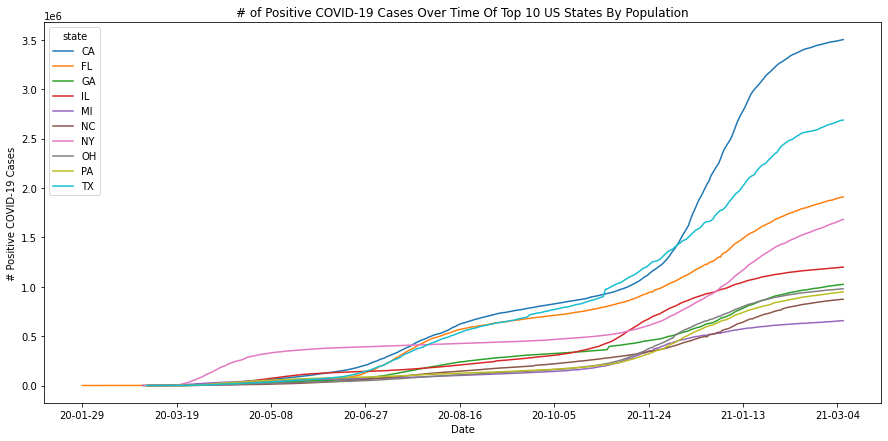

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def visual1():
  with open('cleaned_JSON.csv') as infile:
  	df = pd.read_csv(infile)
  states = df['state'].drop_duplicates()
  allStates = states.to_list()
  wantedStates = ['CA','TX','FL','NY','PA','IL','OH','GA','NC','MI']
  unwantedStates = [i for i in allStates if i not in wantedStates]
  for state in unwantedStates:
	  df[df['state'] == state] = np.nan
  df = df.dropna()
  df.index = range(len(df))
  fig, ax = plt.subplots(figsize =(15,7))
  df.groupby(['date',"state"])['positive'].sum().unstack().plot(ax=ax)
  ax.set_xlabel('Date')
  ax.set_ylabel('# Positive COVID-19 Cases')
  ax.set_title('# of Positive COVID-19 Cases Over Time Of Top 10 US States By Population')
  plt.show()






############ Function Call ############
visual1()

### Visualization 1 Explanation

This line graph shows the 10 most populous states' number of positive COVID-19 cases over time. It shows that there was an intense spike in cases towards the end of 2020 and the beginning of 2021. It also shows that most states tend to follow the same trend, despite there being higher numbers in some of the more populated states, such as California. They all spike around the same time, then they flatten out towards March 2021, which is when the data cuts off. This shows the general trend of COVID infections is similar across the US. It should be noted that the states with larger populations, such as California and Texas, have higher case numbers, but this is expected. They all tend to follow the same trend though!

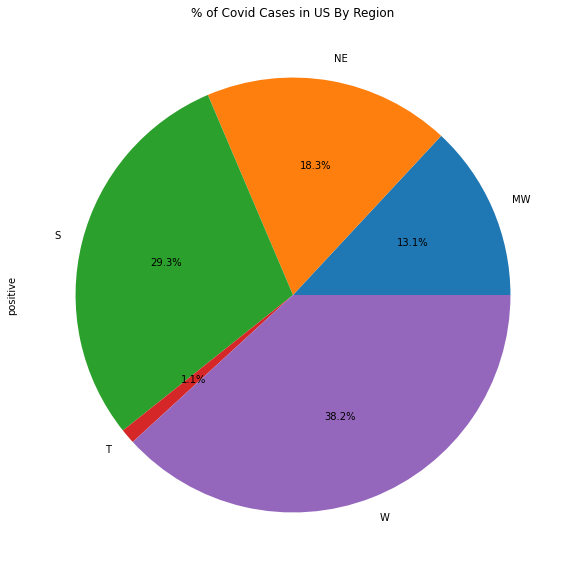

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def visual2():
  with open('cleaned_CSV.csv') as infile:
	  df = pd.read_csv(infile)
  df.columns = ['date','state','death','hospitalized','negative','positive']
  NE = ['PA','NY','VT','NH','MA','RI','CT','NJ','DE','MD','DC','ME']
  MW = ['ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH']
  S = ['TX','OK','AR','LA','KY','TN','MS','AL','GA','FL','SC','NC','VA','WV']
  W = ['WA','OR','CA','ID','NV','AZ','MT','WY','CO','NM','UT','AK','HI']
  df['Region'] = np.where(df['state'].isin(NE),'NE',np.where(df['state'].isin(MW),'MW',np.where(df['state'].isin(S),'S',np.where(df['state'].isin(W),'W','T'))))
  df[df['positive'] == 'No Data'] = np.nan
  df = df.dropna()
  df['positive'] = pd.to_numeric(df['positive'])
  df.groupby('Region')['positive'].max().plot(kind='pie',subplots=True,figsize=(15,10),autopct='%1.1f%%')
  plt.title('% of Covid Cases in US By Region')
  plt.show()





############ Function Call ############
visual2()

### Visualization 2 Explanation

This pie chart displays the percentage of US COVID cases that each region, defined by the US Census Bureau, has in relation to total US cases. S is South, NE is Northeast, MW is Midwest, W is West, and T is the US Territories. Each region has a similar population. Each region has a significantly different percentage. This is significant because it shows that over half the cases in the US were in the South and the West. This trend shows location within the US does have a correlation to percentage of COVID-19 cases.

Saving cleaned_HTML.csv to cleaned_HTML.csv
Saving cleaned_JSON.csv to cleaned_JSON.csv
Saving State_Populations.csv to State_Populations.csv


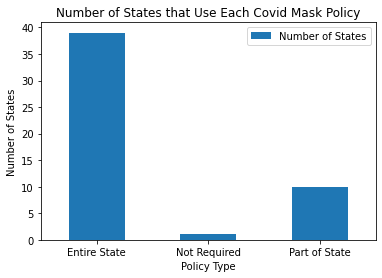

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

def visual3():
	with open('cleaned_HTML.csv') as file:
	  df = pd.read_csv(file)
	requirement_list = df["Mask Required"] 
	require_type = list(set((requirement_list)))
	count_not_required = 0
	count_entire_state = 0
	count_part_of_state = 0
	for x in requirement_list:
		if x == 'Not Required':
			count_not_required +=1
		elif x == 'Entire State':
			count_entire_state +=1
		elif x ==  'Part of State':
			count_part_of_state +=1

	data = {}
	for x in require_type:
		if x == "Not Required":
			data['Not Required'] = (count_not_required)
		elif x == 'Entire State':
			data['Entire State'] = (count_entire_state)
		elif x ==  'Part of State':
			data['Part of State'] = (count_part_of_state)
	
	final_df = pd.DataFrame(list(data.items()),columns = ["Mask Policy",'Number of States'])
	final_df.plot.bar(x = "Mask Policy", y = 'Number of States', rot = 0)
	plt.title('Number of States that Use Each Covid Mask Policy')
	plt.xlabel('Policy Type')
	plt.ylabel('Number of States')
	plt.show()


	plt.show()




############ Function Call ############
visual3()

### Visualization 3 Explanation

The graph above provides us with information on how the United States reacted to the pandemic as a whole by providing us with information about how many states implemented a particular mask policy. As one can see from the graph, roughly 39 states, or approximately 78 percent of all US States, put "entire state" mask policies in place. This can be seen as the "safer" approach as other policies were not see to be as effective. Ten states or twenty percent of all states in the United States put "part of the state" mask requirements in place. One state never put a mask restriction in place, and although that state is not named in the graph, I would like to point out that it was South Dakota, and they had the highest percentage of positive tests and deaths by population, as our insights showed. 

## Summary Files

In [ ]:
import csv
import pandas as pd
import numpy as np
def summary1():
  with open('cleaned_CSV.csv') as infile:
	  df = pd.read_csv(infile)
  df.columns = ['date','state','death','hospitalized','negative','positive']
  NE = ['PA','NY','VT','NH','MA','RI','CT','NJ','DE','MD','DC','ME']
  MW = ['ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH']
  S = ['TX','OK','AR','LA','KY','TN','MS','AL','GA','FL','SC','NC','VA','WV']
  W = ['WA','OR','CA','ID','NV','AZ','MT','WY','CO','NM','UT','AK','HI']
  df['Region'] = np.where(df['state'].isin(NE),'NE',np.where(df['state'].isin(MW),'MW',np.where(df['state'].isin(S),'S',np.where(df['state'].isin(W),'W','T'))))
  df[df['positive'] == 'No Data'] = np.nan
  df = df.dropna()
  df['positive'] = pd.to_numeric(df['positive'])
  regionMax = df.groupby(['Region','state'])['positive'].max() 
  regionMax.to_csv('summary1.csv')





############ Function Call ############
summary1()

FileNotFoundError: ignored

In [ ]:
import csv
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
def summary2():
  with open('cleaned_JSON.csv') as infile:
  	df = pd.read_csv(infile)
  states = df['state'].drop_duplicates()
  allStates = states.to_list()
  wantedStates = ['CA','TX','FL','NY','PA','IL','OH','GA','NC','MI']
  unwantedStates = [i for i in allStates if i not in wantedStates]
  for state in unwantedStates:
	  df[df['state'] == state] = np.nan
  df = df.dropna()
  df.index = range(len(df))
  positivedf = df.groupby(["state"])['positive'].max()
  positivedf.to_csv('summary2.csv')






############ Function Call ############
summary2()

Saving cleaned_JSON.csv to cleaned_JSON (3).csv


# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:
* How plot graph by using group by function in python code example. (n.d.). Retrieved April 14, 2021, from https://www.codegrepper.com/code-examples/python/how+plot+graph+by+using+group+by+function+in+python
* Pandas.dataframe.drop_duplicates¶. (n.d.). Retrieved April 14, 2021, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
* Varun. (2019, December 03). Pandas: Convert a Dataframe column into a list using Series.to_list() or numpy.ndarray.tolist() in python. Retrieved April 15, 2021, from https://thispointer.com/pandas-convert-a-dataframe-column-into-a-list-using-series-to_list-or-numpy-ndarray-tolist-in-python/




# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   https://youtu.be/FhuonPp5sW8


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
